# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Muhammad Rizki]
- **Email:** [muhammad.rizki130304@gmail.com]
- **ID Dicoding:** [Muhammad Rizki]
- **ID Cohort:** [MC130D5Y0184]

## Menentukan Pertanyaan Bisnis

- Bagaimana tren penyewaan sepeda berdasarkan hari kerja dan akhir pekan?
- Bagaimana pengaruh suhu terhadap jumlah penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [7]:
import streamlit as st
import numpy as np
import pandas as pd
import matplotlib
matplotlib.use('Agg')  
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Data Wrangling

### Gathering Data

In [16]:
@st.cache_data
def load_data():
    base_path = "Dashboard"
    day_df = pd.read_csv(os.path.join(base_path, "day.csv"))
    hour_df = pd.read_csv(os.path.join(base_path, "hour.csv"))

    # Menghapus kolom yang tidak diperlukan
    for df in [day_df, hour_df]:
        df.drop(['workingday'], axis=1, inplace=True)
    
    # Mengubah tipe data menjadi kategori
    kategori_kolom = ['season', 'mnth', 'holiday', 'weekday', 'weathersit']
    for df in [day_df, hour_df]:
        for col in kategori_kolom:
            df[col] = df[col].astype("category")
    
    # Mengubah tipe data tanggal
    for df in [day_df, hour_df]:
        df['dteday'] = pd.to_datetime(df['dteday'])
    
    return day_df, hour_df

day_df, hour_df = load_data()

2025-03-10 02:36:47.635 No runtime found, using MemoryCacheStorageManager
2025-03-10 02:36:47.638 No runtime found, using MemoryCacheStorageManager
2025-03-10 02:36:47.642 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-10 02:36:47.644 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-10 02:36:47.645 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-10 02:36:47.742 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-10 02:36:47.744 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


**Insight:**
- Data berhasil dimuat dari file day.csv dan hour.csv.
- Kolom workingday dihapus karena tidak digunakan.
- Kolom kategori dikonversi ke tipe data kategori.

### Assessing Data

In [15]:
print(day_df.info())
print(hour_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   weathersit  731 non-null    category      
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  hum         731 non-null    float64       
 11  windspeed   731 non-null    float64       
 12  casual      731 non-null    int64         
 13  registered  731 non-null    int64         
 14  cnt         731 non-null    int64         
dtypes: category(5), datetime64[ns](1), float64(4), int64(5)
memory usage: 62.0

**Insight:**
- Tipe data sudah sesuai dengan kebutuhan analisis.
- Tidak ditemukan missing values.

### Cleaning Data

In [17]:
rename_dict = {
    'yr': 'year',
    'mnth': 'month',
    'weekday': 'day_of_week',
    'weathersit': 'weather_situation',
    'windspeed': 'wind_speed',
    'cnt': 'total_rentals',
    'hum': 'humidity'
}
day_df.rename(columns=rename_dict, inplace=True)
hour_df.rename(columns={**rename_dict, 'hr': 'hour'}, inplace=True)

**Insight:**
- Nama kolom diubah agar lebih mudah dipahami.


## Exploratory Data Analysis (EDA)

### Explore ...

In [18]:
hourly_count = hour_df.groupby('hour')['total_rentals'].sum().reset_index()
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x='hour', y='total_rentals', data=hourly_count, ax=ax, hue='hour', palette='viridis', legend=False)
ax.set_xlabel("Jam")
ax.set_ylabel("Jumlah Penyewaan")
st.pyplot(fig)


2025-03-10 02:37:03.252 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-10 02:37:03.527 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-10 02:37:03.527 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

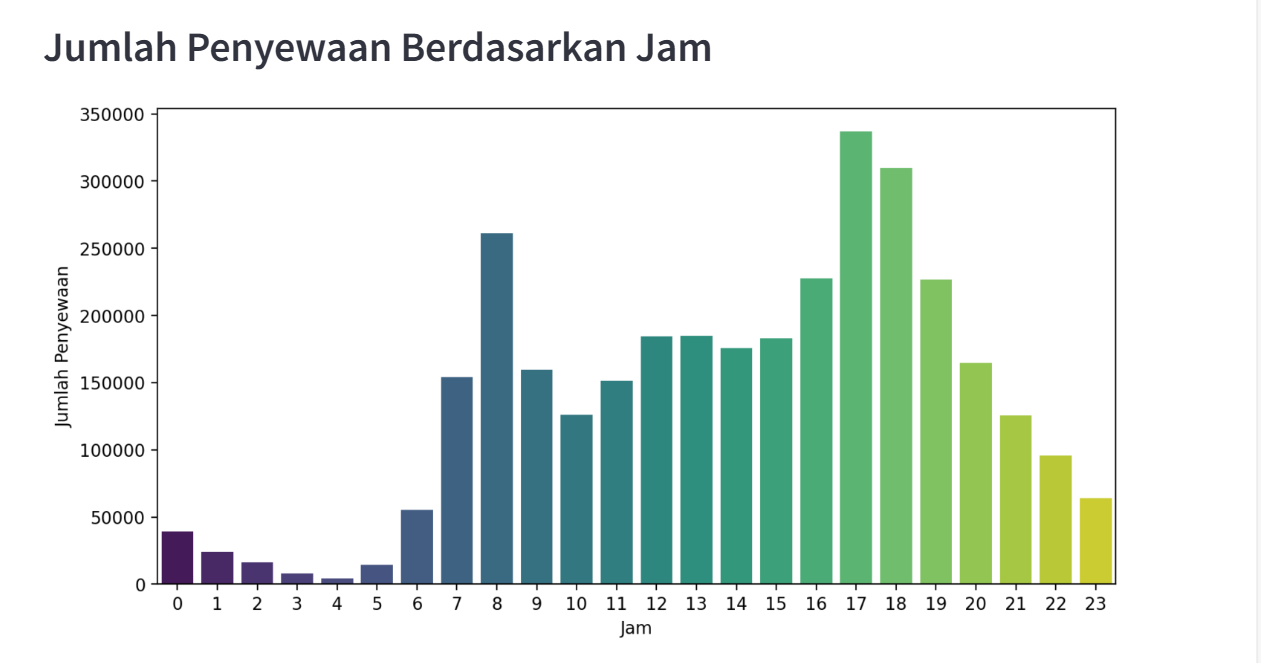

**Insight:**
- Penyewaan sepeda meningkat pada jam sibuk pagi dan sore.


## Visualization & Explanatory Analysis

### Pertanyaan 1:
- Bagaimana tren jumlah penyewaan sepeda berdasarkan hari kerja dan akhir pekan?

In [ ]:

day_category_count = day_df.groupby("day_category")["total_rentals"].sum().reset_index()

fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(x="day_category", y="total_rentals", data=day_category_count, ax=ax, palette="coolwarm")
ax.set_xlabel("Kategori Hari")
ax.set_ylabel("Total Penyewaan")
st.pyplot(fig)


KeyError: 'day_category'

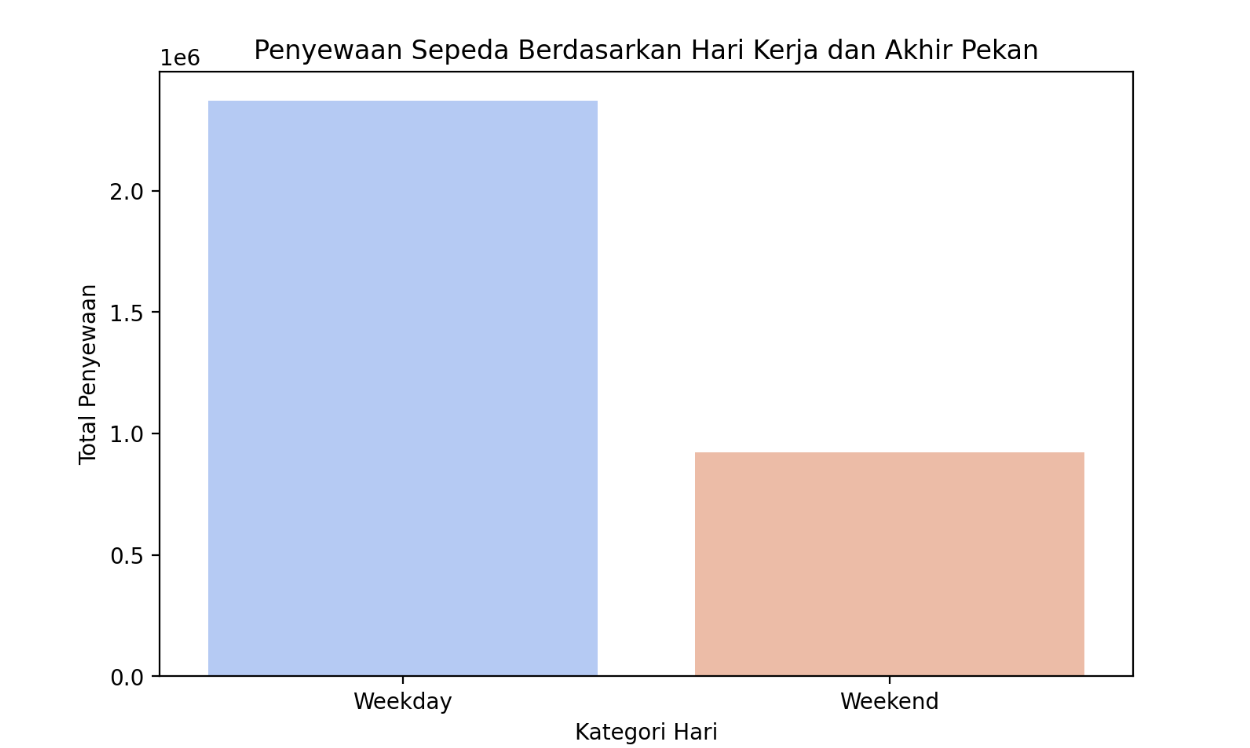

**Insight:**
- Penyewaan lebih tinggi pada hari kerja dibanding akhir pekan.

### Pertanyaan 2:
- Bagaimana pengaruh suhu terhadap jumlah penyewaan sepeda?

In [20]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.scatterplot(x=day_df["temp"], y=day_df["total_rentals"], alpha=0.6, ax=ax)
ax.set_xlabel("Suhu (Normalized)")
ax.set_ylabel("Total Penyewaan")
st.pyplot(fig)

2025-03-10 02:39:25.967 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-10 02:39:26.134 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-10 02:39:26.135 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

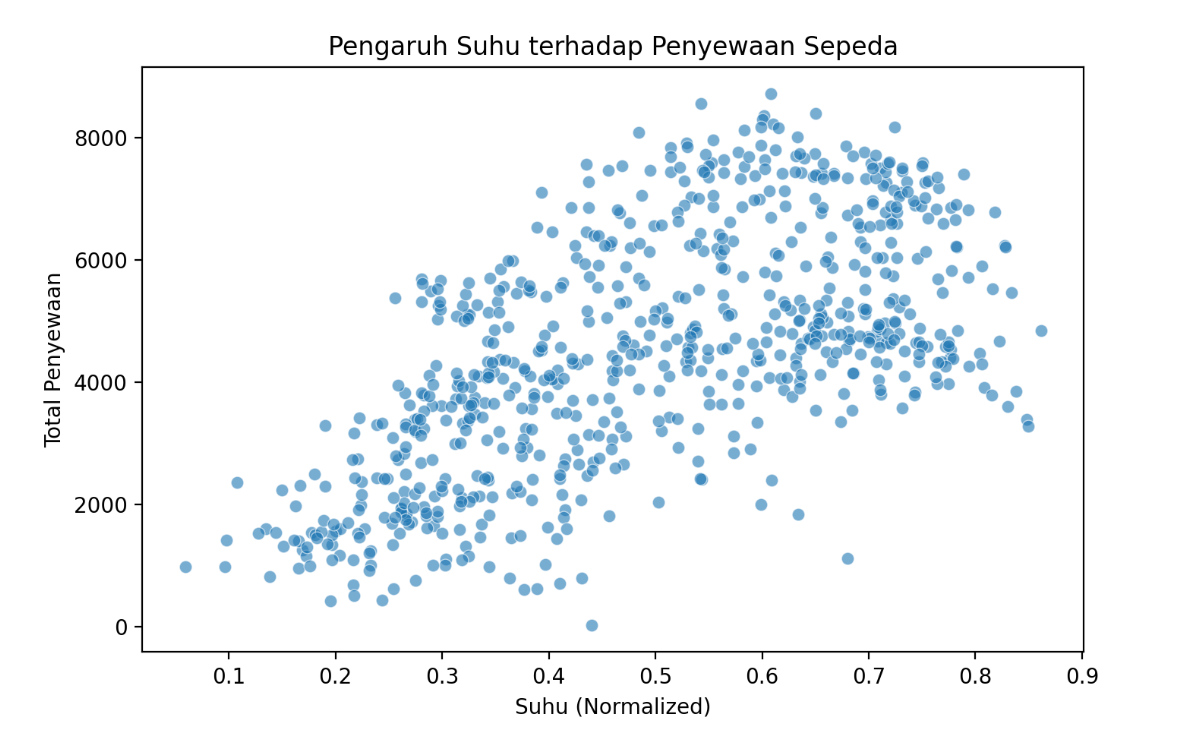

**Insight:**
- Semakin tinggi suhu, jumlah penyewaan cenderung meningkat.


## Analisis Lanjutan (Opsional)

## Conclusion

- Penyewaan lebih tinggi terjadi pada hari kerja dibanding akhir pekan.
- Penyewaan cenderung meningkat saat suhu lebih hangat.